                                        Fabio Teixeira Ramos
                                            2020367

                            A Report Submitted in Partial Fulfilment 
                                    of the requirements for the 
                                            Degree of 
                                BSc in Computing in IT (4th year)



 

                                             May 2024



                                      Supervisor: David McQuaid



In [39]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import pandas as pd  # Imports the Pandas library to work with tabular data (DataFrames)
from imblearn.over_sampling import RandomOverSampler  # Imports a technique to balance imbalanced classes by duplicating samples from the minority class
from collections import Counter  # Imports a tool to count the occurrences of each item in a collection
import matplotlib.pyplot as plt  # Imports a library for creating plots and visualizations
import warnings  # Imports the library to manage warnings in Python

#Ignores all warnings to avoid unnecessary messages in the console
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv("FireWall\log2 (1).csv")

i stated the data Analyze using .info  check the number of entries, data types, and for missing values

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


Provides an overview of the DataFrame, showing the number of columns, 
the data types, the number of non-null values in each column,
and the memory usage of the DataFrame.

df.head() to see an overview of the structure.

In [42]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [43]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

because the .isnull show all outcome zero that means the data has no miss valus. what is good for us.

In [44]:
pd.options.display.float_format = "{:,.2f}".format

i did the options.display in order to have 2 decmal format 

In [45]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,"65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00"
mean,"49,391.97","10,577.39","19,282.97","2,671.05","97,123.95","22,385.80","74,738.15",102.87,65.83,41.40,61.47
std,"15,255.71","18,466.03","21,970.69","9,739.16","5,618,438.91","3,828,138.65","2,463,207.71","5,133.00",302.46,"3,218.87","2,223.33"
min,0.00,0.00,0.00,0.00,60.00,60.00,0.00,1.00,0.00,1.00,0.00
25%,"49,183.00",80.00,0.00,0.00,66.00,66.00,0.00,1.00,0.00,1.00,0.00
50%,"53,776.50",445.00,"8,820.50",53.00,168.00,90.00,79.00,2.00,15.00,1.00,1.00
75%,"58,638.00","15,000.00","38,366.25",443.00,752.25,210.00,449.00,6.00,30.00,3.00,2.00
max,"65,534.00","65,535.00","65,535.00","65,535.00","1,269,359,015.00","948,477,220.00","320,881,795.00","1,036,116.00","10,824.00","747,520.00","327,208.00"


In [46]:
df.shape

(65532, 12)

In [47]:
df.nunique()

Source Port             22724
Destination Port         3273
NAT Source Port         29152
NAT Destination Port     2533
Bytes                   10724
Bytes Sent               6683
Bytes Received           8814
Packets                  1116
Elapsed Time (sec)        915
pkts_sent                 749
pkts_received             922
Action                      4
dtype: int64

In [48]:
print("Distribution of labels", df["Action"].value_counts()) 

Distribution of labels allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


Prints the distribution of unique values in the "Action" column, 
counting how many times each label appears in the DataFrame.

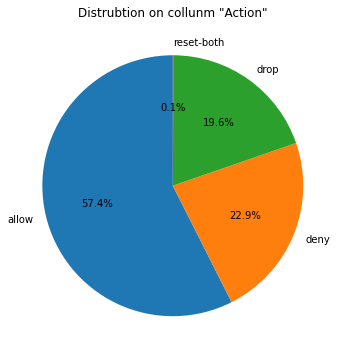

In [57]:
action_counts = df['Action'].value_counts()


plt.figure(figsize=(6, 6))  
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distrubtion on collunm "Action"')
plt.show()

The pie show the database is unbalance only 0,1 of reset-both.

Get the count of unique values in the "Action" column.
action_counts = df['Action'].value_counts()

Create a new figure for plotting with specified size (6x6 inches).
plt.figure(figsize=(6, 6))  

Create a pie chart showing the distribution of labels in the "Action" column.
- 'labels' specifies the labels for the pie slices.
- 'autopct' shows the percentage to one decimal place on each pie slice.
- 'startangle=90' starts the pie chart at a 90-degree angle (12 o'clock).
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', startangle=90)



In [54]:
X = df.drop(columns=['Action']) 
y = df['Action'] 


ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
print("Distribuição após o oversampling:", Counter(y_resampled))

Distribuição após o oversampling: Counter({'allow': 37640, 'drop': 37640, 'deny': 37640, 'reset-both': 37640})


In [55]:
print("Distribution of labels", df_resampled["Action"].value_counts()) 


Distribution of labels allow         37640
drop          37640
deny          37640
reset-both    37640
Name: Action, dtype: int64


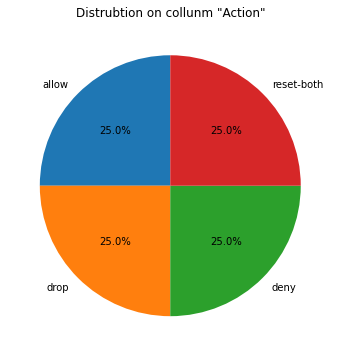

In [56]:
action_counts = df_resampled['Action'].value_counts()

plt.figure(figsize=(6, 6))  
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distrubtion on collunm "Action"')
plt.show()

i use the Random Oversampling to duplicate samples from the minority class, the idea is balance the data in order to get better accurance.

After completing the data analysis, I believe the data is now ready to initiate the machine learning modeling process, 
as I did not identify any missing values or gaps.

In the book Thoughtful MachineLearning with Python,they use a Decision Trees to Classifying Mushrooms 
and that is what i will do here in order to classifying the 4 categories – “allow, deny, drop, reset-both” 
in the incoming traffic to the firewall.
Decision tree classification is a supervised learning algorithm mostly used in
classification problems. Unlike the other model, decision trees can easily handle a mix
of numeric and categorical attributes and can even classify data for which attributes are
missing

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


The sklearn import tree has many commnad in order to make a Decision Trees.
in order to use a decision tree, all the data must be numerical and our "Action" column contains string values,
so we need to address this by converting it to numerical data.

In [15]:
d = {'allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3}
df_resampled['Action'] = df_resampled['Action'].map(d)

Create a dictionary that maps specific string values to corresponding numeric codes.
d = {'allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3}

Use the dictionary to map values in the 'Action' column to their numeric codes.
This is useful when converting categorical data to numeric data for machine learning or analysis.
df_resampled['Action'] = df_resampled['Action'].map(d)

In [58]:
df_resampled.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,"150,560.00","150,560.00","150,560.00","150,560.00","150,560.00","150,560.00","150,560.00","150,560.00","150,560.00","150,560.00","150,560.00"
mean,"43,360.44","15,990.59","10,039.71","1,348.82","42,336.66","9,802.65","32,534.01",45.50,28.69,18.69,26.81
std,"19,340.48","20,226.13","18,394.68","6,572.92","3,706,997.21","2,525,584.19","1,625,488.58","3,386.80",202.19,"2,123.70","1,467.13"
min,0.00,0.00,0.00,0.00,60.00,60.00,0.00,1.00,0.00,1.00,0.00
25%,"28,135.00",445.00,0.00,0.00,66.00,66.00,0.00,1.00,0.00,1.00,0.00
50%,"51,265.00","3,389.00",0.00,0.00,70.00,70.00,0.00,1.00,0.00,1.00,0.00
75%,"57,639.25","30,317.00","12,369.75",53.00,190.00,146.00,70.00,2.00,1.00,1.00,1.00
max,"65,534.00","65,535.00","65,535.00","65,535.00","1,269,359,015.00","948,477,220.00","320,881,795.00","1,036,116.00","10,824.00","747,520.00","327,208.00"


Then we have to separate the feature columns from the Action column.
The feature columns are the columns that we try to predict from,
and the target column is the column with the values we try to classifer.

In [17]:
features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received'
           , 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

X = df_resampled[features]
y = df_resampled['Action']


where we split the data in two parts, the variebles that will help us to classifier (in case x)
and the one we will predicti ( in case Y) 

In [18]:
print(X)

        Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0             57222                53            54587                    53   
1             56258              3389            56258                  3389   
2              6881             50321            43265                 50321   
3             50553              3389            50553                  3389   
4             50002               443            45848                   443   
...             ...               ...              ...                   ...   
150555         1024             21854                0                     0   
150556        12283             25773                0                     0   
150557        12285             61248                0                     0   
150558        11337             25773                0                     0   
150559         8116             25773                0                     0   

        Bytes  Bytes Sent  Bytes Receiv

In [19]:
print(y) 

0         0
1         0
2         0
3         0
4         0
         ..
150555    3
150556    3
150557    3
150558    3
150559    3
Name: Action, Length: 150560, dtype: int64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Up we are traning the Decision Tree, 
test_size=0.2: This parameter determines the size of the test set relative to the entire dataset. 
In this case, it's set to 0.2, which means the test set will contain 20% of the data,
while the training set will contain the remaining 80%.
and the random_state=42: the random seed used by the random number generator.
It ensures that the data is split in a reproducible manner.

In [21]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

Here is Where we create a decision tree, important concept from decision tree is known as Gini, also known as information gain.
when we take this data and we run a decision tree algorithm on top of this data the very first thing that will happen here is
decision tree algorithm has to decide how to create the tree. when creating a tree it needs to decide what should be the root node when
I say what should be the root node the candidate for root nodes are all the independent variables in my data base ( this case = 
X = df[features]).
let's say i take Bytes and Packets, now i hava two candidates of my root node for the decision tree that where gini take place,
gini will compute the probability using the output of them and wherever it finds the minimum Gini index that particular
split the particular column will be selected as the tree splitting criteria.


In [22]:
predictions = dtree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("show the total of accuracy {:.2f}%".format(accuracy * 100))

show the total of accuracy 99.97%


before balance the data the accuracy was 99.98% now it is 99.97%

In [23]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average='weighted')


In [24]:
print("F1-score tree decission:{:.2f}%".format(f1 * 100))

F1-score tree decission:99.97%


Achieving 99% accuracy and an F1-score of 99 is quite impressive. 
It indicates that the model is performing exceptionally well in classification tasks
look a good perfor of decission tree.

In [26]:
report_dtree = classification_report(y_test,predictions )
print("Relatório de classificação:")
print(report_dtree)

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7526
           1       1.00      1.00      1.00      7503
           2       1.00      1.00      1.00      7528
           3       1.00      1.00      1.00      7555

    accuracy                           1.00     30112
   macro avg       1.00      1.00      1.00     30112
weighted avg       1.00      1.00      1.00     30112



In [27]:
predictions = dtree.predict(X)
print("Previsões:")
print(predictions [:10] )

Previsões:
[0 0 0 0 0 0 0 0 0 0]


Result in  nunbers.

In [28]:
reverse_d = {v: k for k, v in d.items()}
predictions_names = [reverse_d[prediction] for prediction in predictions]

i am create a new dictionary where the keys are the original values
and the values are the original keys of the dictionary "d".

In [29]:
print("Previsões:")
print(predictions_names [:10])

Previsões:
['allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow']


In [30]:
print(dtree.predict([[4000, 450, 3423, 677,70,71230,2210,2022,0,330,220]])) 

[2]


In [31]:
new_predict = dtree.predict([[4000, 450, 3423, 677, 70, 71230, 2210, 2022, 0, 330, 220]])
name= reverse_d[new_predict[0]]

In [32]:
print("Label name:", name)

Label name: drop


Up are the values corresponding to those features: 
Source Port, Destination Port, NAT Source Port, NAT Destination Port, Bytes, Bytes Sent, Bytes Received, Packets,
Elapsed Time (sec), pkts_sent, pkts_received.
If you want to predict the traffic on a firewall.

As my secund classifier i chosse the support vector machines (SVMs). This algorithm uses
decision boundaries to split data into multiple parts and operates well in higher
dimensions due to feature transformation and ignoring distances between data
points.Its primary objective is to find the optimal hyperplane that best separates data points 
belonging to different classes.




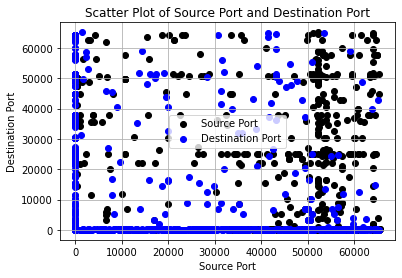

In [33]:
import matplotlib.pyplot as plt
df_subset = df.head(1000)


plt.scatter(df_subset['Source Port'], df_subset['Destination Port'], c='k', label='Source Port')  
plt.scatter(df_subset['NAT Source Port'], df_subset['Destination Port'], c='b', label='Destination Port') 
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.title('Scatter Plot of Source Port and Destination Port')
plt.legend()
plt.grid(True)
plt.show()

I did a plot up in order to us visualize how bad the data is linearly separable, 
meaning we cant draw a straight line (or plane, or hyperplane in higher dimensions) to separate the classes.
Becuse of that now we gonna use The Radial Basis Function (RBF) Kernel is one of the most commonly used kernel functions
in Support Vector Machines (SVM).
It's particularly effective for handling non-linearly separable data.
 


In [34]:
from sklearn.svm import SVC
X_svmtrain, X_svmtest, y_svmtrain, y_svmtest = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_svmtrain, y_svmtrain)
accuracy = svm_classifier.score(X_svmtest, y_svmtest)

In [36]:
print("accuracy of SVM with kernel RBF :{:.2f}%".format(accuracy * 100))
 

accuracy of SVM with kernel RBF :73.55%


before the data balance the accuracy of SVM with kernel RBF was 57.56%, now it is  73.55%.

In [37]:
predictions_svm = svm_classifier.predict(X_test)
reverse_d = {v: k for k, v in d.items()}

In [38]:
predictions_names = [reverse_d[prediction] for prediction in predictions]
print("Previsões no conjunto de teste:")
print(predictions_names[:10])

Previsões no conjunto de teste:
['allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow']


In [34]:
print("Previsões:")
print(predictions_svm [:10] )

Previsões:
[0 0 0 0 0 0 0 0 0 0]
